# IMPORTING DATA

Country dataset include following information: 
 - name - common name in english
 - topLevelDomain - country code top-level domain 
 - alpha2Code - code ISO 3166-1 alpha-2 
 - alpha3Code - code ISO 3166-1 alpha-3 
 - callingCodes - list of all suffixes calling codes assigned to this country
 - capital - capital city(ies)
 - altSpellings - alternative spellings for country name
 - region
 - subregion
 - population
 - latlng - latitude and longitude 
 - demonym - name of residents living in the country
 - area - land area in km² 
 - gini - measures the inequality among values of a frequency distribution (for example, levels of income). A Gini coefficient of zero expresses perfect equality, where all values are the same (for example, where everyone has the same income). A Gini coefficient of one (or 100%) expresses maximal inequality among values (e.g., for a large number of people, where only one person has all the income or consumption, and all others have none, the Gini coefficient will be very nearly one).
 (Hệ số Gini thường được sử dụng để biểu thị mức độ bất bình đẳng trong phân phối thu nhập giữa các tầng lớp cư dân. Số 0 tượng trưng cho sự bình đẳng thu nhập tuyệt đối (mọi người đều có cùng một mức thu nhập), số 1 tượng trưng cho sự bất bình đẳng thu nhập tuyệt đối (một người có toàn bộ thu nhập, trong khi tất cả mọi người khác không có thu nhập).

Hệ số Gini cũng được dùng để biểu thị mức độ chênh lệch về giàu nghèo. Khi sử dụng hệ số Gini trong trường hợp này, điều kiện yêu cầu phải thỏa mãn không tồn tại cá nhân nào có thu nhập ròng âm.)
 
- timezones
- borders - land borders 
- nativeName - country native names
- numericCode
- currencies - list of all currencies
 	- key: ISO 4217 currency code
 	- value: currency object
 		- key: `name` name of the currency
 		- key: `symbol` symbol of the currency
- list of official languages (`languages`)
	- key: three-letter ISO 639-3 language code
 	- value: name of the language in english 
- flag - Emoji flag
- regionalBlocs - type of intergovernmental agreement, often part of a regional intergovernmental organization, where barriers to trade (tariffs and others) are reduced or eliminated among the participating states.
- cioc - code International Olympic Committee 

In [52]:
import requests
import pandas as pd
import numpy as np
import json
from PIL import Image
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [53]:
def api_import(n):
    response = requests.get(n)
    status=response.status_code
    print("Import status:",status)
    d=response.json()
    df=pd.json_normalize(d)
    print("Data shape:",df.shape[0])
    print('Data column:', df.columns)
    return df          

In [54]:
df = api_import('https://restcountries.eu/rest/v2/all')

Import status: 200
Data shape: 250
Data column: Index(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes',
       'capital', 'altSpellings', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders',
       'nativeName', 'numericCode', 'currencies', 'languages', 'flag',
       'regionalBlocs', 'cioc', 'translations.de', 'translations.es',
       'translations.fr', 'translations.ja', 'translations.it',
       'translations.br', 'translations.pt', 'translations.nl',
       'translations.hr', 'translations.fa'],
      dtype='object')


In [55]:
df.dtypes

name                object
topLevelDomain      object
alpha2Code          object
alpha3Code          object
callingCodes        object
capital             object
altSpellings        object
region              object
subregion           object
population           int64
latlng              object
demonym             object
area               float64
gini               float64
timezones           object
borders             object
nativeName          object
numericCode         object
currencies          object
languages           object
flag                object
regionalBlocs       object
cioc                object
translations.de     object
translations.es     object
translations.fr     object
translations.ja     object
translations.it     object
translations.br     object
translations.pt     object
translations.nl     object
translations.hr     object
translations.fa     object
dtype: object

In [56]:
df['languages']

0      [{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...
1      [{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...
2      [{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...
3      [{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...
4      [{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...
                             ...                        
245    [{'iso639_1': 'fr', 'iso639_2': 'fra', 'name':...
246    [{'iso639_1': 'es', 'iso639_2': 'spa', 'name':...
247    [{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...
248    [{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...
249    [{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...
Name: languages, Length: 250, dtype: object

# EDA & Cleaning data

## Drop unnecessary columns

In [57]:
df.rename(columns={'name':'country','alpha3Code':'alphaCode'},inplace=True)
df.drop(['topLevelDomain','alpha2Code','altSpellings','flag','callingCodes','numericCode','translations.de', 'translations.es',
       'translations.fr', 'translations.ja', 'translations.it',
       'translations.br', 'translations.pt', 'translations.nl',
       'translations.hr', 'translations.fa', 'cioc'],axis=1,inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        250 non-null    object 
 1   alphaCode      250 non-null    object 
 2   capital        250 non-null    object 
 3   region         250 non-null    object 
 4   subregion      250 non-null    object 
 5   population     250 non-null    int64  
 6   latlng         250 non-null    object 
 7   demonym        250 non-null    object 
 8   area           240 non-null    float64
 9   gini           153 non-null    float64
 10  timezones      250 non-null    object 
 11  borders        250 non-null    object 
 12  nativeName     250 non-null    object 
 13  currencies     250 non-null    object 
 14  languages      250 non-null    object 
 15  regionalBlocs  250 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 31.4+ KB


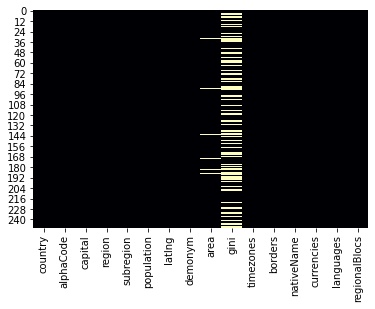

In [59]:
sns.heatmap(df.isnull(),cbar=False, cmap='magma'
#             , yticklabels=False
           )
plt.show()

## Categorial variables

Basic statistics and frequency distributed for each categorial variables as below:
- region
- subregion
- demonym
- currencies
- languages
- regionalBlocs

### Missing values and fill in

In [60]:
#There are some columns with empty string values which are not shown as NaN
#Fill all those with Unknown string
def fill_empty(col):
    new=[]
    for i in col:
        if i == '':
            new.append('Unknown')
        else:
            new.append(i)
    return new

df['subregion']=fill_empty(df['subregion'])
df['region']=fill_empty(df['region'])
df['demonym']=fill_empty(df['demonym'])
df['capital']=fill_empty(df['capital'])

### region and subregion column

In [61]:
df['region'].value_counts()

Africa      60
Americas    57
Europe      53
Asia        50
Oceania     27
Unknown      2
Polar        1
Name: region, dtype: int64

In [62]:
df[df['region'] == 'Unknown']

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,currencies,languages,regionalBlocs
30,Bouvet Island,BVT,Unknown,Unknown,Unknown,0,"[-54.43333333, 3.4]",Unknown,49.0,NaN,[UTC+01:00],[],Bouvetøya,"[{'code': 'NOK', 'name': 'Norwegian krone', 's...","[{'iso639_1': 'no', 'iso639_2': 'nor', 'name':...",[]
98,Heard Island and McDonald Islands,HMD,Unknown,Unknown,Unknown,0,"[-53.1, 72.51666666]",Heard and McDonald Islander,412.0,NaN,[UTC+05:00],[],Heard Island and McDonald Islands,"[{'code': 'AUD', 'name': 'Australian dollar', ...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",[]


Fill region and subregion for row 30 (Bouvet Island) with same information as in row 167 (Norway) as they are in similar area.

In [63]:
df.loc[30,'region'] = df.loc[167,'region']
df.loc[30,'subregion'] = df.loc[167,'subregion']

Fill region and subregion for row 98 (Heard Island and McDonald Islands) with same information as in row 13 (Australia) as they are in Australian territory.

In [64]:
df.loc[98,'region'] = df.loc[13,'region']
df.loc[98,'subregion'] = df.loc[13,'subregion']

In [65]:
df['region'].value_counts()

Africa      60
Americas    57
Europe      54
Asia        50
Oceania     28
Polar        1
Name: region, dtype: int64

In [66]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['region'])])
fig.show()

## sort value từng cột từ cao xuống thấp

### capital column

In [67]:
df[df['capital'] == 'Unknown']

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,currencies,languages,regionalBlocs
8,Antarctica,ATA,Unknown,Polar,Unknown,1000,"[-74.65, 4.48]",Unknown,14000000.0,NaN,"[UTC-03:00, UTC+03:00, UTC+05:00, UTC+06:00, U...",[],Antarctica,"[{'code': 'AUD', 'name': 'Australian dollar', ...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",[]
30,Bouvet Island,BVT,Unknown,Europe,Northern Europe,0,"[-54.43333333, 3.4]",Unknown,49.0,NaN,[UTC+01:00],[],Bouvetøya,"[{'code': 'NOK', 'name': 'Norwegian krone', 's...","[{'iso639_1': 'no', 'iso639_2': 'nor', 'name':...",[]
33,United States Minor Outlying Islands,UMI,Unknown,Americas,Northern America,300,[],American,NaN,NaN,"[UTC-11:00, UTC-10:00, UTC+12:00]",[],United States Minor Outlying Islands,"[{'code': 'USD', 'name': 'United States Dollar...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",[]
98,Heard Island and McDonald Islands,HMD,Unknown,Oceania,Australia and New Zealand,0,"[-53.1, 72.51666666]",Heard and McDonald Islander,412.0,NaN,[UTC+05:00],[],Heard Island and McDonald Islands,"[{'code': 'AUD', 'name': 'Australian dollar', ...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",[]
131,Macao,MAC,Unknown,Asia,Eastern Asia,649100,"[22.16666666, 113.55]",Chinese,30.0,NaN,[UTC+08:00],[CHN],澳門,"[{'code': 'MOP', 'name': 'Macanese pataca', 's...","[{'iso639_1': 'zh', 'iso639_2': 'zho', 'name':...",[]


In [68]:
## not necessary to fill in info here

### demonym column

In [69]:
df[df['demonym'] == 'Unknown']

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,nativeName,currencies,languages,regionalBlocs
8,Antarctica,ATA,Unknown,Polar,Unknown,1000,"[-74.65, 4.48]",Unknown,14000000.00,NaN,"[UTC-03:00, UTC+03:00, UTC+05:00, UTC+06:00, U...",[],Antarctica,"[{'code': 'AUD', 'name': 'Australian dollar', ...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",[]
30,Bouvet Island,BVT,Unknown,Europe,Northern Europe,0,"[-54.43333333, 3.4]",Unknown,49.00,NaN,[UTC+01:00],[],Bouvetøya,"[{'code': 'NOK', 'name': 'Norwegian krone', 's...","[{'iso639_1': 'no', 'iso639_2': 'nor', 'name':...",[]
78,French Guiana,GUF,Cayenne,Americas,South America,254541,"[4.0, -53.0]",Unknown,NaN,NaN,[UTC-03:00],"[BRA, SUR]",Guyane française,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'fr', 'iso639_2': 'fra', 'name':...","[{'acronym': 'USAN', 'name': 'Union of South A..."
99,Holy See,VAT,Rome,Europe,Southern Europe,451,"[41.9, 12.45]",Unknown,0.44,NaN,[UTC+01:00],[ITA],Sancta Sedes,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'la', 'iso639_2': 'lat', 'name':...",[]


Fill in empty demonym values and dit similar demonym into a single name.

In [70]:
df.loc[8,'demonym'] = 'International'
df.loc[30,'demonym'] = df.loc[167,'demonym']
df.loc[78,'demonym'] = 'French'
df.loc[79,'demonym'] = 'French'
df.loc[99,'demonym'] = 'Papal'
df.loc[95,'demonym'] = 'Guinea'
df.loc[69,'demonym'] = 'Guinea'
df.loc[173,'demonym'] = 'Guinea'
df.loc[165,'demonym'] = 'Korean'
df.loc[210,'demonym'] = 'Korean'
df.loc[211,'demonym'] = 'Sudanese'
df.loc[221,'demonym'] = 'Chinese'

In [71]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['demonym'])])

fig.update_layout(
    title_text='Demonym Histogram', # title of plot
    xaxis_title_text='Demonym category', # xaxis label
    yaxis_title_text='Demonym count', # yaxis label
#     xaxis={'categoryorder':'category ascending'},# xtitle axis sort
    xaxis={'categoryorder':'total descending'}, # values on xaxis sort 
    # bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

## sort value từng cột từ cao xuống thấp

### timezone column

In [72]:
#Unlist timezones column
time=[]
for i in range(0,250):
    a=df['timezones'][i]
    a=','.join(a)
    time.append(a)
df['timezones']=time

### borders column and number of neighboring country counts (borders_count)

tui addd thêm cột counting số borders vô đây. ông nhìn xuống cái statistics phía dưới sẽ có cái giá trị borders count tới gần 15, hơi vô lý chút. Cái này tui chưa kịp check, mai mình check cái này tiếp nha.
the same cho cột language cũng có phần nào giống giống vậy. tui nghi ngờ thôi ko chắc đc.

Fill empty list columns with value None

In [73]:
border_c = []
for i in df['borders']:
    a = len(i)
    border_c.append(a)

df.insert(12,'borders_count',border_c)

In [74]:
df.head(3)

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,borders_count,nativeName,currencies,languages,regionalBlocs
0,Afghanistan,AFG,Kabul,Asia,Southern Asia,27657145,"[33.0, 65.0]",Afghan,652230.0,27.8,UTC+04:30,"[IRN, PAK, TKM, UZB, TJK, CHN]",6,افغانستان,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","[{'acronym': 'SAARC', 'name': 'South Asian Ass..."
1,Åland Islands,ALA,Mariehamn,Europe,Northern Europe,28875,"[60.116667, 19.9]",Ålandish,1580.0,NaN,UTC+02:00,[],0,Åland,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...","[{'acronym': 'EU', 'name': 'European Union', '..."
2,Albania,ALB,Tirana,Europe,Southern Europe,2886026,"[41.0, 20.0]",Albanian,28748.0,34.5,UTC+01:00,"[MNE, GRC, MKD, KOS]",4,Shqipëria,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","[{'acronym': 'CEFTA', 'name': 'Central Europea..."


In [75]:
#Unlist borders column and fill empty value with None string
border=[]
for i in range(250):
    if len(df['borders'][i]) > 0:
        a=df['borders'][i]
        a=','.join(a)
        border.append(a)
    else:
        border.append('None')
df['borders']=border

In [76]:
#Creat function to fill empty list columns with value None
def fill_empty_list(col):
    fill=[]
    for i in col:
        if len(i) == 0:
            fill.append('None')
        else:
            fill.append(i)
    return fill

#Fill [] empty list values in borders column
bor=df['borders']
bor1=fill_empty_list(bor)
df['borders']=bor1

df.head()

,country,alphaCode,capital,region,subregion,population,latlng,demonym,area,gini,timezones,borders,borders_count,nativeName,currencies,languages,regionalBlocs
0,Afghanistan,AFG,Kabul,Asia,Southern Asia,27657145,"[33.0, 65.0]",Afghan,652230.0,27.8,UTC+04:30,"IRN,PAK,TKM,UZB,TJK,CHN",6,افغانستان,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","[{'acronym': 'SAARC', 'name': 'South Asian Ass..."
1,Åland Islands,ALA,Mariehamn,Europe,Northern Europe,28875,"[60.116667, 19.9]",Ålandish,1580.0,NaN,UTC+02:00,None,0,Åland,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...","[{'acronym': 'EU', 'name': 'European Union', '..."
2,Albania,ALB,Tirana,Europe,Southern Europe,2886026,"[41.0, 20.0]",Albanian,28748.0,34.5,UTC+01:00,"MNE,GRC,MKD,KOS",4,Shqipëria,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","[{'acronym': 'CEFTA', 'name': 'Central Europea..."
3,Algeria,DZA,Algiers,Africa,Northern Africa,40400000,"[28.0, 3.0]",Algerian,2381741.0,35.3,UTC+01:00,"TUN,LBY,NER,ESH,MRT,MLI,MAR",7,الجزائر,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","[{'acronym': 'AU', 'name': 'African Union', 'o..."
4,American Samoa,ASM,Pago Pago,Oceania,Polynesia,57100,"[-14.33333333, -170.0]",American Samoan,199.0,NaN,UTC-11:00,None,0,American Samoa,"[{'code': 'USD', 'name': 'United State Dollar'...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...",[]


### currencies column

In [77]:
#Function to extract and unlist currencies column
curr=[]
for i in range(0,250):
    tab=pd.Series(df['currencies'][i])
    tab=pd.json_normalize(tab)
    code=tab['code'].to_string()
    code=code.replace('0','').replace('(none)','').replace(' ','').replace('[G]','').replace('None','')
    curr.append(code)
    
df['currencies']=curr
df['currencies']=df['currencies'].str.replace('\n[1-9]',' ').str.strip()

In [78]:
df['currencies'].unique()

array(['AFN', 'EUR', 'ALL', 'DZD', 'USD', 'AOA', 'XCD', 'AUD GBP', 'ARS',
       'AMD', 'AWG', 'AUD', 'AZN', 'BSD', 'BHD', 'BDT', 'BBD', 'BYN BYR',
       'BZD', 'XOF', 'BMD', 'BTN INR', 'BOB', 'BAM', 'BWP', 'NOK', 'BRL',
       'BND SGD', 'BGN', 'BIF', 'KHR USD', 'XAF', 'CAD', 'CVE', 'KYD',
       'CLP', 'CNY', 'COP', 'KMF', 'CDF', 'NZD CKD', 'CRC', 'HRK',
       'CUC CUP', 'ANG', 'CZK', 'DKK', 'DJF', 'DOP', 'EGP', 'ERN', 'ETB',
       'FKP', 'FJD', 'XPF', 'GMD', 'GEL', 'GHS', 'GIP', 'GTQ', 'GBP',
       'GNF', 'GYD', 'HTG', 'HNL', 'HKD', 'HUF', 'ISK', 'INR', 'IDR',
       'IRR', 'IQD', 'GBP IMP', 'ILS', 'JMD', 'JPY', 'GBP JEP', 'JOD',
       'KZT', 'KES', 'KWD', 'KGS', 'LAK', 'LBP', 'LSL ZAR', 'LRD', 'LYD',
       'CHF', 'MOP', 'MKD', 'MGA', 'MWK', 'MYR', 'MVR', 'MRO', 'MUR',
       'MXN', 'MDL', 'MNT', 'MAD', 'MZN', 'MMK', 'NAD ZAR', 'NPR', 'NZD',
       'NIO', 'NGN', 'KPW', 'OMR', 'PKR', 'PAB USD', 'PGK', 'PYG', 'PEN',
       'PHP', 'PLN', 'QAR', 'RON', 'RUB', 'RWF', 'SHP', 'WST', 

For countries using more than two currencies (one popular and one only used in that country), we will count only the more popular currency for better statistic.

Special cases in which both currencies are used in more than one countries, all currencies will be kept.

In [79]:
# df.loc[249,'currencies'] = 'BWP,GBP,CNY,EUR,INR,JPY,ZAR,USD'
# df.loc[25,'currencies'] = 'INR'
# df.loc[40,'currencies'] = 'USD'
# df.loc[55,'currencies'] = 'NZD'
# df.loc[110,'currencies'] = 'GBP'
# df.loc[115,'currencies'] = 'GBP'
# df.loc[125,'currencies'] = 'ZAR'
# df.loc[154,'currencies'] = 'ZAR'
# df.loc[172,'currencies'] = 'USD'
# df.loc[177,'currencies'] = 'NZD'
# df.loc[225,'currencies'] = 'USD'
# df.loc[234,'currencies'] = 'AUD'
# #check chỉ xử lý typo

In [80]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['currencies'])])

fig.update_layout(
    title_text='Currencies Histogram', # title of plot
    xaxis_title_text='Currencies category', # xaxis label
    yaxis_title_text='Currency count', # yaxis label
#     xaxis={'categoryorder':'category ascending'},# xtitle axis sort
    xaxis={'categoryorder':'total descending'}, # values on xaxis sort 
    # bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

#sort cao xuống thấp

### languages and languages_count column

In [81]:
#Function to extract and unlist languages column
lang=[]
count_lang=[]
for i in range(0,250):
    tab=pd.Series(df['languages'][i])
    tab=pd.json_normalize(tab)
    name=tab['name'].tolist()
    count=len(name)
    name=','.join(name)
    lang.append(name)
    count_lang.append(count)

df['languages']=lang
df['count_lang']=count_lang

In [82]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['languages'])])

fig.update_layout(
    title_text='Languages Histogram', # title of plot
    xaxis_title_text='Languages category', # xaxis label
    yaxis_title_text='Languages count', # yaxis label
#     xaxis={'categoryorder':'category ascending'},# xtitle axis sort
    xaxis={'categoryorder':'total descending'}, # values on xaxis sort 
    # bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

#sort cao xuống thấp

### regionalBloc column

In [83]:
#Function to extract and unlist regionalBlocs column
#Containing [] list of values
bloc=[]   
for i in range(0,250):
    if len(df['regionalBlocs'][i]) > 0:
        tab=pd.Series(df['regionalBlocs'][i])
        tab=pd.json_normalize(tab)
        name=tab['name'].tolist()
        name=''.join(name)
        bloc.append(name)
    else:
        bloc.append('None')


df['regionalBlocs']=bloc

In [84]:
df['regionalBlocs'].value_counts()

None                                                      75
African Union                                             50
European Union                                            32
Arab League                                               12
Caribbean Community                                       11
African UnionArab League                                  10
Association of Southeast Asian Nations                    10
Union of South American Nations                            9
South Asian Association for Regional Cooperation           8
Central European Free Trade Agreement                      7
Central American Integration System                        6
Eurasian Economic Union                                    5
European Free Trade Association                            4
Pacific AllianceUnion of South American Nations            3
Caribbean CommunityCentral American Integration System     2
North American Free Trade Agreement                        2
Caribbean CommunityUnion

In [85]:
fig = go.Figure(data=[go.Histogram(histfunc="count", x=df['regionalBlocs'])])

fig.update_layout(
    title_text='regionalBlocs Histogram', # title of plot
    xaxis_title_text='regionalBlocs category', # xaxis label
    yaxis_title_text='regionalBlocs count', # yaxis label
#     xaxis={'categoryorder':'category ascending'},# xtitle axis sort
    xaxis={'categoryorder':'total descending'}, # values on xaxis sort 
    # bargap=0.2, # gap between bars of adjacent location coordinates
    #bargroupgap=0.1 # gap between bars of the same location coordinates
)


fig.show()

#sort column value

## Quantitative variables

### Missing values and fill_in

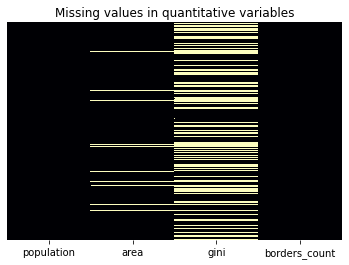

In [86]:
quan_lst = ['population','area','gini','borders_count'
#             ,'languages_count'
           ]
sns.heatmap(df[quan_lst].isnull(),cbar=False, cmap='magma', yticklabels=False)
plt.title('Missing values in quantitative variables')
plt.show()

__area column__

Fill missing area values.

In [87]:
df.loc[33,'area'] = 34.2
df.loc[78,'area'] = 83534
df.loc[90,'area'] = 1628
df.loc[140,'area'] = 1128
df.loc[143,'area'] = 374
df.loc[171,'area'] = 6020
df.loc[183,'area'] = 2511
df.loc[188,'area'] = 394
df.loc[209,'area'] = 3903
df.loc[216,'area'] = 377

__population and population density (popDensity)__

Add population desensity columns (popDensity)

In [88]:
df.insert(9, 'popDensity', round(df['population']/df['area'],2))
df['popDensity'].describe()

count      250.000000
mean       407.082640
std       1948.712907
min          0.000000
25%         27.840000
50%         81.840000
75%        209.047500
max      21636.670000
Name: popDensity, dtype: float64

__Missing values heatmap__

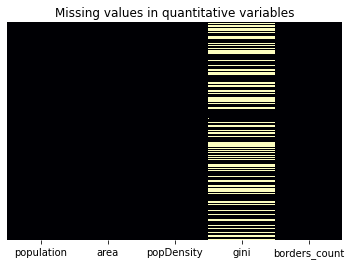

In [89]:
quan_lst = ['population','area','popDensity','gini','borders_count',
#             'languages_count'
           ]
sns.heatmap(df[quan_lst].isnull(),cbar=False, cmap='magma', yticklabels=False)
plt.title('Missing values in quantitative variables')
plt.show()

### EDA

In [90]:
df.describe()

,population,area,popDensity,gini,borders_count,count_lang
count,2.500000e+02,2.500000e+02,250.000000,153.000000,250.000000,250.000000
mean,2.939655e+07,6.015619e+05,407.082640,40.177124,2.600000,1.472000
std,1.244578e+08,1.914304e+06,1948.712907,9.265119,2.675187,0.901369
min,0.000000e+00,4.400000e-01,0.000000,24.000000,0.000000,1.000000
25%,2.029030e+05,1.110000e+03,27.840000,33.700000,0.000000,1.000000
50%,4.648734e+06,6.492950e+04,81.840000,38.600000,2.000000,1.000000
75%,1.803955e+07,3.727260e+05,209.047500,46.200000,4.000000,2.000000
max,1.377422e+09,1.712444e+07,21636.670000,65.800000,15.000000,10.000000


In [91]:
lst = df.describe().columns

fig = make_subplots(rows=1, cols=len(lst))

for i in range(len(lst)):
    fig.add_trace(go.Box(y=df[lst[i]],
                         name=lst[i],
                         boxpoints='outliers'
                        ), row=1, col=i+1)

fig.update_layout(title_text="Box Plot Quantitative Variables",
                  yaxis_title_text='Value Range')
fig.show()

In [92]:

fig = make_subplots(rows=1, cols=len(lst))

for i in range(len(lst)):
    fig.add_trace(go.Histogram(x= df[lst[i]],
                               name=lst[i],
                               histnorm='probability', 
                               ), col=i+1, row=1)

fig.update_layout(
    title_text='Histogram Quantitative Variables', # title of plot
#     xaxis_title_text='Value Range', # xaxis label
    yaxis_title_text='Count Percentage', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
    
fig.show()

Quantitative variables of population and area columns are positive skew. 

Values in gini column is normally distributed.

## Other varibales

### latlng column

In [93]:
#Create lat and lon columns:
lat=[]
lon=[]
for i in range(250):
    if len(df['latlng'][i]) > 0:
        la=df['latlng'][i][0]
        lo=df['latlng'][i][1]
        lat.append(la)
        lon.append(lo)
    else:
        lat.append(np.nan)
        lon.append(np.nan)
df['lat']=lat
df['lon']=lon

# df.drop('latlng',axis=1,inplace=True)

# Organize sub-datasets and Questions 

In [94]:
info_lst = ['country','alphaCode', 'flag', 'capital', 
#             'latlng', 
            'population',  'area','borders', 'region', 'subregion', 'demonym','languages']
# language = ['nativeName','languages_iso639_1', 'languages_iso639_2', 
#             'languages_nativeName','region', 'subregion','latlng','translations.de',
#             'translations.es', 'translations.fr', 'translations.ja',
#             'translations.it', 'translations.br', 'translations.pt',
#             'translations.nl', 'translations.hr', 'translations.fa']
economic = ['country','alphaCode',
#             'latlng',  
            'gini', 'borders','currencies','regionalBlocs']

# demonym: nhóm ng, tộc người, nhóm dân tộc
# gini: độ chênh lệch giàu nghèo

In [95]:
df.columns

Index(['country', 'alphaCode', 'capital', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'popDensity', 'gini', 'timezones',
       'borders', 'borders_count', 'nativeName', 'currencies', 'languages',
       'regionalBlocs', 'count_lang', 'lat', 'lon'],
      dtype='object')

## Regional and population

__population__
Map 1:

Population density Vs. Gini

Map scatter chia 4 phần. 

Cột y : population density
Cột x: gini (check missinh value gini)
color marker: màu của continent

Độ lớn của marker: population size#


submap1:loại outliner, vẽ geomap thể hiện độ tăng dần theo color scale của popDen
submap2: vẽ geo map theo color scale cho gini

In [96]:
reg = df['region'].unique()

# Load data, define hover text and bubble size

hover_text = []

for index, row in df.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Population: {population}<br>'+
                      'Population density: {popDensity}<br>'+
                      'Wealth difference: {gini}').format(country=row['country'],
                                                          population=row['population'],
                                                          popDensity=row['popDensity'],
                                                          gini=row['gini']))
    

df['text_pop'] = hover_text

fig = go.Figure()

# lst = ['Singapore','Hong Kong','India','China']    
# cond = (df['region']=='Asia') & (df['gini'].isnull() == False) & (df['country'].isin(lst) == False)
# fig.add_trace(go.Scatter(x=df[cond]['population'],
#                          y=df[cond]['gini'],
#                          name='Asia - no outliners', 
#                          text=df[cond]['text'],
#                          mode='markers',
#                          marker=dict(size=df[cond]['popDensity'],
#                                      sizemode='area',
# #                                      sizeref=2.*max(size)/(40.**2),
# #                                      sizemin=4,
# #                                      color = df['region']
#                                     )))

for i in reg:
    cond=(df['region']==i) & (df['gini'].isnull() == False)
    fig.add_trace(go.Scatter(x=df[cond]['population'],
                            y=df[cond]['gini'],
                            name=i, 
                            text=df[cond]['text_pop'],
                            mode='markers',
                            marker=dict(
                            size=df[cond]['popDensity'],
                            sizemode='area',
#                             sizeref=2.*max(size)/(40.**2),
#                             sizemin=4,
#                             color = df['region']
                            )))

fig.update_layout(
    title='Population v. Wealth difference',
    xaxis=dict(
        title='Country population',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Gini index',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)    

fig.show()
print('Y-axis: Wealth difference within each country. The higher the Gini index is, the higher is difference between the rich and the poor.')
print('X-axis: Population of each country.')
print('Dot size: Population density of each country.')




Y-axis: Wealth difference within each country. The higher the Gini index is, the higher is difference between the rich and the poor.
X-axis: Population of each country.
Dot size: Population density of each country.


In [97]:
fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations = df['alphaCode'],
    z = df['gini'],
    text = df['country'],
    colorscale = 'reds',
#     autocolorscale=True,
    reversescale=False,
    zmin=0, 
    zmax=df['gini'].max(),
    marker_line_color='darkgray',
    marker_line_width=0.5,
#     colorbar_tickprefix = '/km2',
#     colorbar_ticksuffix = '/km2',
    colorbar_title = 'World Wealth<br>Difference',
))

fig.update_layout(
    title_text='World Wealth Difference',
    geo=dict(
#         scope='europe', #limit area to be showed on map
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))

fig.show()

print('The higher is Gini index is, the higher is difference between the rich and the poor.')

The higher is Gini index is, the higher is difference between the rich and the poor.


In [98]:
lst = df['popDensity'].sort_values(ascending = False).head(int(len(df)*0.075)).index
# lst = []
cond = df.index.isin(lst) == False

fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations = df[cond]['alphaCode'],
    z = df[cond]['popDensity'],
    text = df[cond]['country'],
    colorscale = 'Blues',
#     autocolorscale=True,
    reversescale=False,
    zmin=0, 
    zmax=df[cond]['popDensity'].max(),
    marker_line_color='darkgray',
    marker_line_width=0.5,
#     colorbar_tickprefix = '/km2',
    colorbar_ticksuffix = '/km2',
    colorbar_title = 'World Population<br>Density',
))

fig.update_layout(
    title_text='World Population Density',
    geo=dict(
#         scope='europe', #limit area to be showed on map
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))

fig.show()

#  The 'scope' property is an enumeration that may be specified as:
#       - One of the following enumeration values:
#             ['world', 'usa', 'europe', 'asia', 'africa', 'north
#             america', 'south america']

print('Country not display in World Population Density graph:')
print(df.loc[lst,['country','popDensity']])

Country not display in World Population Density graph:
                        country  popDensity
131                       Macao    21636.67
147                      Monaco    19009.90
202                   Singapore     7795.77
101                   Hong Kong     6634.33
86                    Gibraltar     5523.33
17                      Bahrain     1836.47
138                       Malta     1346.15
24                      Bermuda     1147.30
136                    Maldives     1146.74
203   Sint Maarten (Dutch part)     1124.91
18                   Bangladesh     1091.05
99                     Holy See     1025.00
115                      Jersey      868.97
93                     Guernsey      807.68
171         Palestine, State of      777.82
191  Saint Martin (French part)      697.72
19                     Barbados      662.79
221                      Taiwan      649.39


## languages

Map2: 

Map represent geographic region/sub-regions VS languages groups => map color phân màu những nước nào nói nhiều loại ngôn ngữ nhất + scatter lot show (y:  số nước nói ngôn ngữ,
                                    x = population nói ngôn ngữ đó, 
                                    size = gini
                                    color = phân loại ngôn ngữ, 
subplot (1 row 2 cols)

In [99]:
fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations = df['alphaCode'],
    z = df['count_lang'],
    text = df['country'],
#     colorscale = 'Blues',
    autocolorscale=True,
    reversescale=True,
    zmin=0, 
    zmax=df['count_lang'].max(),
    marker_line_color='darkgray',
    marker_line_width=0.5,
#     colorbar_tickprefix = '/km2',
#     colorbar_ticksuffix = '/km2',
    colorbar_title = 'Official Languages<br>Count',
))

fig.update_layout(
    title_text='World Official Languages Count For Each Country',
    geo=dict(
#         scope='europe', #limit area to be showed on map
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))

fig.show()


lang = ['English', 'French', 'Spanish', 'Arabic', 'Portuguese','German', 'Dutch', 'Chinese', 'Italian']
count_lang=[]
for c in lang:
    count=df[df['languages'].str.contains(c)].shape[0]
    count_lang.append(count)

count=pd.DataFrame(count_lang,index=lang,columns=['count'])

count=count.sort_values('count',ascending=False)

fig = go.Figure([go.Bar(x=count.index, y=count['count'])])

fig.update_layout(title='Top spoken languages in the world',
                  xaxis=dict(title = 'Languages'),
                  yaxis=dict(title='Amount of countries'))
        
fig.show()

## currencies

geomap cho mỗi loai currrencies - color = correncies 

Map 3: 

 Map represent geographic region/sub-regions VS currency groups
vẽ geo map thế giới:
-color = Currency groups
=> vẫn nên lọc lấy 1 loại most popular currency ở những nc chọn 2 như trên

submap1: map 10 loại currenci thông dụng nhất tính trên user counts:  scatter y = số nước chấp nhận, x = population - users count, size = gini

In [100]:
currency = df['currencies'].value_counts().head(10)
currency

fig = go.Figure([go.Bar(x=currency.index, y=currency)])

fig.update_layout(title='Most popular currencies in the world',
                  xaxis=dict(title = 'Currencies'),
                  yaxis=dict(title='Amount of countries'))
        
fig.show()


## regional blocs

Map 4: 2 subplots:
subplot1:Map represent geographic region/sub-regions Vs.regionalBlocs  (pie charts)
-color = mỗi blocs
-marker = currencies (in name)
    
subplot2:violin or boxplot phân cấp giàu nghèo trên mỗi blocs



In [101]:
lst = df['regionalBlocs'].unique()
lst=lst[lst!='None']
color = px.colors.qualitative.Light24[:len(lst)]

cor_dic = {}

for i in range(len(lst)):
    cor_dic[lst[i]] = color[i]

cond = df['regionalBlocs'] != 'None'

fig = px.choropleth(df, 
#                     color_discrete_sequence=px.colors.qualitative.Light24[:19],
                    color_discrete_map=cor_dic,
                    color = df[cond]['regionalBlocs'],
                    locations=df[cond]['alphaCode'], 
                    hover_name=df[cond]['country']
                   )
# fig.update_geos(fitbounds="locations", visible=False)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.update_layout(title={'text': "Regional Blocs",
#                          'xanchor': 'center',
#                          'yanchor': 'top'
                        },
                  geo=dict(showframe=False,
                           showcoastlines=False,
                           projection_type='equirectangular'),
                  )

fig.show()



color = px.colors.qualitative.Light24[:19]

fig = go.Figure()

for i in range(len(lst)):
    cond = (df['regionalBlocs'] == lst[i]) & (df['regionalBlocs'] != 'None')
    fig.add_trace(go.Box(y=df[cond]['gini'],
                         name=lst[i],
                         boxpoints='outliers',
                         marker_color = color[i]
                        ))

fig.update_layout(title_text="Wealth Difference according to Regional Blocs",
                  yaxis_title_text='Value Range',
                  autosize=False,
                  width=950,
                  height=600,
                 )

fig.show()